## Imports

In [1]:
# import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import time
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
# decision tree
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
# boost
from sklearn.ensemble import AdaBoostClassifier
# knn
from sklearn.neighbors import KNeighborsClassifier
# svm
from sklearn import preprocessing
from sklearn import svm
# nn
from sklearn.neural_network import MLPClassifier
## Model 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [40]:
wines = pd.read_csv("winequality-red.csv")
wines.count()
# wines.head()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [ ]:
# cleaned_games = games.drop(['id', 'white_id', 'black_id', 'moves','created_at','last_move_at'], axis=1)
# labelencoder = LabelEncoder()
# cleaned_games['winner'] = labelencoder.fit_transform(cleaned_games['winner'])
# cleaned_games['rated'] = labelencoder.fit_transform(cleaned_games['rated'])
# cleaned_games['victory_status'] = labelencoder.fit_transform(cleaned_games['victory_status'])
# cleaned_games['increment_code'] = labelencoder.fit_transform(cleaned_games['increment_code'])
# cleaned_games['opening_eco'] = labelencoder.fit_transform(cleaned_games['opening_eco'])
# cleaned_games['opening_name'] = labelencoder.fit_transform(cleaned_games['opening_name'])
# cleaned_games

In [5]:
X = wines.drop('quality', axis=1)
y = wines['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [6]:

def draw_validation_curve( algo , param, train_scores, valid_scores ):
#     train_scores, valid_scores = validation_curve(classifier, X, y, param ,graph_range ,cv=cv ,n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(valid_scores, axis=1)
    test_scores_std = np.std(valid_scores, axis=1)
    q20 = plt.figure(1)
    ax20 = q20.add_subplot(111)
    ax20.plot(1 - train_scores_mean,label = 'Training Error')
    ax20.plot(1 - test_scores_mean,label = 'Testing Error')
    ax20.set_ylabel('Error')
    ax20.set_xlabel(param)
    ax20.set_title( algo + ' - ' + param )
    ax20.legend(loc=0)

In [7]:
def draw_learning_curve(algo, train_sizes, train_scores, test_scores):
    cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)    
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    q20 = plt.figure(2)
    ax20 = q20.add_subplot(111)
    ax20.plot(train_sizes,1 - train_scores_mean,label = 'Training Error')
    ax20.plot(train_sizes,1 - test_scores_mean,label = 'Testing Error')
    ax20.set_ylabel('Error')
    ax20.set_xlabel('Data Size')
    ax20.set_title('Learning Curve for ' + algo)
    ax20.legend(loc=0)
    prediction = clf.predict(X_test)
    accuracy = accuracy_score(y_test,prediction)
    confusionMatrix = confusion_matrix(y_test,prediction)
    print (confusion_matrix)

In [8]:
## decision tree

In [9]:
parameters = {'criterion':('entropy', 'gini'),\
              'max_depth':np.arange(start=1,stop=25),\
              'random_state':[1,2,3],\
              'max_features':('auto','sqrt','log2',None),\
              'max_leaf_nodes':[2,10,500,1000],\
              'min_samples_split':[1,2,10]}

In [10]:
decision_tree = DecisionTreeClassifier(max_depth=20)
clf = GridSearchCV(decision_tree, parameters, cv=5,n_jobs=13)
clf.fit(X_train, y_train)

/Users/sam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.57045676 0.56044282 0.55711297]
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=20), n_jobs=13,
             param_grid={'criterion': ('entropy', 'gini'),
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'max_features': ('auto', 'sqrt', 'log2', None),
                         'max_leaf_nodes': [2, 10, 500, 1000],
                         'min_samples_split': [1, 2, 10],
                         'random_state': [1, 2, 3]})

In [11]:
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=500, random_state=1)
{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 500, 'min_samples_split': 2, 'random_state': 1}
0.6146966527196652


In [12]:
draw_validation_curve('DecisionTree',DecisionTreeClassifier(),X_train, y_train,'max_depth',5,13)

TypeError: draw_validation_curve() takes 4 positional arguments but 7 were given

In [13]:
draw_validation_curve('DecisionTree',DecisionTreeClassifier(),X_train, y_train,'max_leaf_nodes',5,13)

TypeError: draw_validation_curve() takes 4 positional arguments but 7 were given

In [14]:
draw_validation_curve('DecisionTree',DecisionTreeClassifier(),X_train, y_train,'min_samples_split',5,13)

TypeError: draw_validation_curve() takes 4 positional arguments but 7 were given

In [15]:
train_sizes, train_scores, test_scores =learning_curve(DecisionTreeClassifier(criterion="entropy",\
                                       max_depth=4,max_leaf_nodes=10,random_state=3,max_features='log2',min_samples_split=2),\
    X_train, y_train, cv=cv, n_jobs=13,train_sizes=[.2,.3,.4,.5,.6,.7,.8,.9])

draw_learning_curve('Decision Tree', train_sizes, train_scores, test_scores)

NameError: name 'cv' is not defined

In [43]:

# visualization of decision tree
clf =  DecisionTreeClassifier(random_state=3, criterion='gini', max_depth=2)
clf = clf.fit(X_train, y_train)
features = list(X_train.columns.values)
dot_data = tree.export_graphviz(clf, out_file=None, 
                        feature_names=features,  
                        class_names=list(map(str, set(y))),  
                        filled=True, rounded=True,  
                        special_characters=True)
graph = graphviz.Source(dot_data)
graph.render(filename='wine_dt.dot')

'wine_dt.dot.pdf'

# Boosting

In [18]:
parameters = {\
'learning_rate':[0.25,0.5,0.75,1.0,1.5,2],\
'random_state':[1,2,3],\
'n_estimators':[10,20,30,40,50]}
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
dt = DecisionTreeClassifier(max_depth=20,min_samples_split=75)
alf = AdaBoostClassifier(base_estimator = dt)
start = time.time()
clf = GridSearchCV(alf, parameters, cv=cv,n_jobs=14)
clf.fit(X_train, y_train)
end = time.time()
total = end - start
print(total)

24.090691804885864


In [19]:
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                         min_samples_split=75),
                   learning_rate=0.25, n_estimators=40, random_state=1)
{'learning_rate': 0.25, 'n_estimators': 40, 'random_state': 1}
0.5946666666666667


/Users/sam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=learning_rate, param_range=[0.1        0.13877551 0.17755102 0.21632653 0.25510204 0.29387755
 0.33265306 0.37142857 0.41020408 0.44897959 0.4877551  0.52653061
 0.56530612 0.60408163 0.64285714 0.68163265 0.72040816 0.75918367
 0.79795918 0.83673469 0.8755102  0.91428571 0.95306122 0.99183673
 1.03061224 1.06938776 1.10816327 1.14693878 1.18571429 1.2244898
 1.26326531 1.30204082 1.34081633 1.37959184 1.41836735 1.45714286
 1.49591837 1.53469388 1.57346939 1.6122449  1.65102041 1.68979592
 1.72857143 1.76734694 1.80612245 1.84489796 1.88367347 1.92244898
 1.96122449 2.        ] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


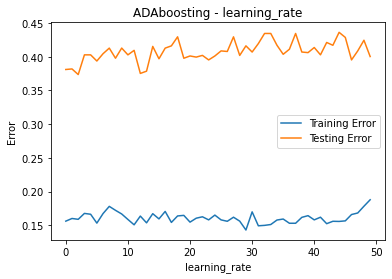

In [20]:
train_scores, valid_scores = validation_curve(AdaBoostClassifier(base_estimator = dt),\
                                              X_train, y_train,'learning_rate',\
                                              np.linspace(start=0.1,stop=2,num=50),cv=5,n_jobs=14)
draw_validation_curve('ADAboosting', 'learning_rate', train_scores, valid_scores)

/Users/sam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=n_estimators, param_range=[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


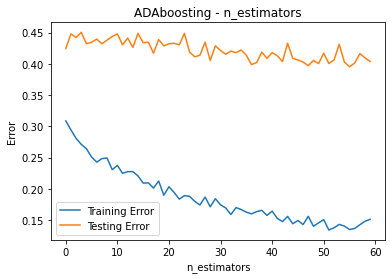

In [21]:
train_scores, valid_scores = validation_curve(AdaBoostClassifier(base_estimator = dt), \
                                              X_train, y_train,'n_estimators',\
                                              np.arange(start=10,stop=70),cv=5,n_jobs=14)
draw_validation_curve('ADAboosting', 'n_estimators', train_scores, valid_scores)

<function confusion_matrix at 0x7fcec5bf8700>


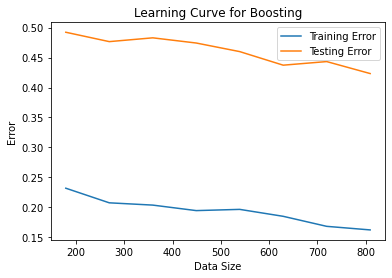

In [22]:
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
train_sizes, train_scores, test_scores =\
 learning_curve(AdaBoostClassifier(base_estimator = dt,learning_rate=1.0,random_state=3,n_estimators=50),\
 X_train, y_train, cv=cv, n_jobs=14,\
  train_sizes=[.2,.3,.4,.5,.6,.7,.8,.9])
draw_learning_curve('Boosting', train_sizes, train_scores, test_scores)

## k-Nearest Neighbors

In [23]:
parameters = {'algorithm':('auto','ball_tree','kd_tree','brute'),'n_neighbors':[1,3,5,7,10,15,20],\
              'leaf_size':[4,6,8,10,12,14]}
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
dt = KNeighborsClassifier()
clf = GridSearchCV(dt, parameters, cv=5,n_jobs=13)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=13,
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'leaf_size': [4, 6, 8, 10, 12, 14],
                         'n_neighbors': [1, 3, 5, 7, 10, 15, 20]})

In [24]:
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

KNeighborsClassifier(leaf_size=4, n_neighbors=1)
{'algorithm': 'auto', 'leaf_size': 4, 'n_neighbors': 1}
0.5362796373779638


In [25]:
draw_validation_curve('KNeighbors', KNeighborsClassifier(),X_train, y_train,'n_neighbors', cv ,13)

TypeError: draw_validation_curve() takes 4 positional arguments but 7 were given

<function confusion_matrix at 0x7fcec5bf8700>


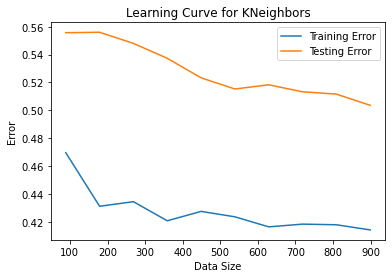

In [26]:

train_sizes, train_scores, test_scores =\
 learning_curve(KNeighborsClassifier(algorithm='auto',n_neighbors=10,leaf_size=4),\
                X_train, y_train, cv=cv, n_jobs=13,\
  train_sizes=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
draw_learning_curve('KNeighbors' , train_sizes, train_scores, test_scores)

In [27]:
## Support Vector Machines

In [28]:
X = preprocessing.scale(X_train)
parameters = {'kernel':('rbf','linear'),\
'C':[0.0001,0.001,0.01,0.1,1.0,1.01,1.001,1.0001],\
'gamma':np.logspace(start=-1, stop=2, num=15)}
svm_i = svm.SVC(cache_size=15000)
clf = GridSearchCV(svm_i, parameters, cv=5,n_jobs=10)
clf.fit(X, y_train)

GridSearchCV(cv=5, estimator=SVC(cache_size=15000), n_jobs=10,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 1.01, 1.001,
                               1.0001],
                         'gamma': array([  0.1       ,   0.16378937,   0.26826958,   0.43939706,
         0.71968567,   1.17876863,   1.93069773,   3.16227766,
         5.17947468,   8.48342898,  13.89495494,  22.75845926,
        37.2759372 ,  61.05402297, 100.        ]),
                         'kernel': ('rbf', 'linear')})

In [29]:
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

SVC(C=1.01, cache_size=15000, gamma=0.7196856730011519)
{'C': 1.01, 'gamma': 0.7196856730011519, 'kernel': 'rbf'}
0.6272140864714086


/Users/sam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=C, param_range=[1.00000000e-04 4.09142857e-02 8.17285714e-02 1.22542857e-01
 1.63357143e-01 2.04171429e-01 2.44985714e-01 2.85800000e-01
 3.26614286e-01 3.67428571e-01 4.08242857e-01 4.49057143e-01
 4.89871429e-01 5.30685714e-01 5.71500000e-01 6.12314286e-01
 6.53128571e-01 6.93942857e-01 7.34757143e-01 7.75571429e-01
 8.16385714e-01 8.57200000e-01 8.98014286e-01 9.38828571e-01
 9.79642857e-01 1.02045714e+00 1.06127143e+00 1.10208571e+00
 1.14290000e+00 1.18371429e+00 1.22452857e+00 1.26534286e+00
 1.30615714e+00 1.34697143e+00 1.38778571e+00 1.42860000e+00
 1.46941429e+00 1.51022857e+00 1.55104286e+00 1.59185714e+00
 1.63267143e+00 1.67348571e+00 1.71430000e+00 1.75511429e+00
 1.79592857e+00 1.83674286e+00 1.87755714e+00 1.91837143e+00
 1.95918571e+00 2.00000000e+00] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in

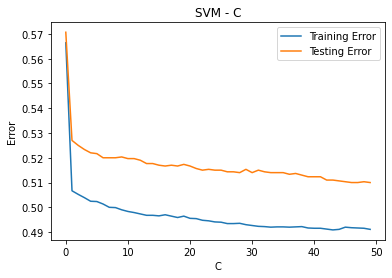

In [30]:
train_scores, valid_scores = validation_curve(svm.SVC(cache_size=15000), X_train, y_train,'C',\
                                              np.linspace(start=.0001,stop=2),cv=cv, n_jobs=14)
draw_validation_curve('SVM', 'C', train_scores, valid_scores)

/Users/sam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=gamma, param_range=[  0.1          0.11513954   0.13257114   0.1526418    0.17575106
   0.20235896   0.23299518   0.26826958   0.30888436   0.35564803
   0.40949151   0.47148664   0.54286754   0.62505519   0.71968567
   0.82864277   0.95409548   1.09854114   1.26485522   1.45634848
   1.67683294   1.93069773   2.22299648   2.55954792   2.9470517
   3.39322177   3.90693994   4.49843267   5.17947468   5.96362332
   6.86648845   7.90604321   9.10298178  10.48113134  12.06792641
  13.89495494  15.9985872   18.42069969  21.20950888  24.42053095
  28.11768698  32.37457543  37.2759372   42.9193426   49.41713361
  56.89866029  65.51285569  75.43120063  86.85113738 100.        ] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


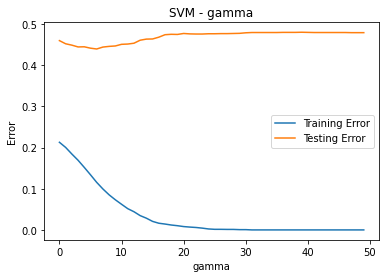

In [31]:

train_scores, valid_scores = validation_curve(svm.SVC(cache_size=15000), \
                                              X_train, y_train,'gamma',\
                                              np.logspace(start=-1, stop=2),cv=cv, n_jobs=14)
draw_validation_curve('SVM', 'gamma', train_scores, valid_scores)

<function confusion_matrix at 0x7fcec5bf8700>


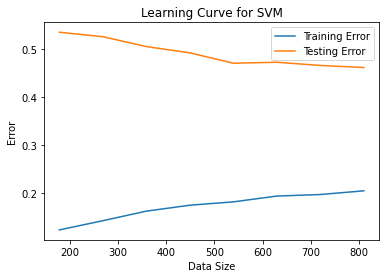

In [32]:

train_sizes, train_scores, test_scores =\
 learning_curve(svm.SVC(cache_size=15000,C=1.001,kernel='rbf',tol=0.5,gamma=0.1),\
 X_train, y_train, cv=cv, n_jobs=14,\
  train_sizes=[.2,.3,.4,.5,.6,.7,.8,.9])
draw_learning_curve('SVM', train_sizes, train_scores, test_scores)

In [33]:
## Neural Networks

In [34]:

parameters = {'activation':('identity','logistic','tanh','relu'),\
'alpha':[0.0001,0.001,0.01],\
'learning_rate':('constant','invscaling','adaptive'),\
'learning_rate_init':[0.0001,0.001,0.01,.1],\
'hidden_layer_sizes':[(2,), (5,), (10,)]}
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
mlp = MLPClassifier(max_iter=2000)
start = time.time()
clf = GridSearchCV(mlp, parameters, cv=5,n_jobs=14)
clf.fit(X_train, y_train)
end = time.time()
total = end - start

In [35]:
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=2000)
{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'learning_rate_init': 0.001}
0.5996652719665272


/Users/sam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=alpha, param_range=[1.00000000e-06 1.18367347e-06 1.36734694e-06 1.55102041e-06
 1.73469388e-06 1.91836735e-06 2.10204082e-06 2.28571429e-06
 2.46938776e-06 2.65306122e-06 2.83673469e-06 3.02040816e-06
 3.20408163e-06 3.38775510e-06 3.57142857e-06 3.75510204e-06
 3.93877551e-06 4.12244898e-06 4.30612245e-06 4.48979592e-06
 4.67346939e-06 4.85714286e-06 5.04081633e-06 5.22448980e-06
 5.40816327e-06 5.59183673e-06 5.77551020e-06 5.95918367e-06
 6.14285714e-06 6.32653061e-06 6.51020408e-06 6.69387755e-06
 6.87755102e-06 7.06122449e-06 7.24489796e-06 7.42857143e-06
 7.61224490e-06 7.79591837e-06 7.97959184e-06 8.16326531e-06
 8.34693878e-06 8.53061224e-06 8.71428571e-06 8.89795918e-06
 9.08163265e-06 9.26530612e-06 9.44897959e-06 9.63265306e-06
 9.81632653e-06 1.00000000e-05] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will resul

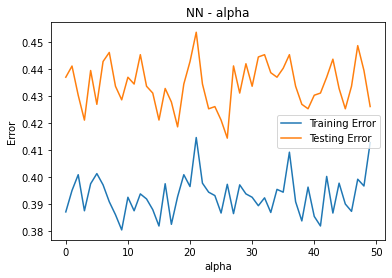

In [36]:
train_scores, valid_scores = validation_curve(MLPClassifier(max_iter=2000), X_train, y_train,'alpha',\
                                              np.linspace(start=0.000001,stop=0.00001),cv=5,n_jobs=14)
draw_validation_curve('NN', 'alpha', train_scores, valid_scores)

/Users/sam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=learning_rate_init, param_range=[1.00000000e-04 8.26122449e-03 1.64224490e-02 2.45836735e-02
 3.27448980e-02 4.09061224e-02 4.90673469e-02 5.72285714e-02
 6.53897959e-02 7.35510204e-02 8.17122449e-02 8.98734694e-02
 9.80346939e-02 1.06195918e-01 1.14357143e-01 1.22518367e-01
 1.30679592e-01 1.38840816e-01 1.47002041e-01 1.55163265e-01
 1.63324490e-01 1.71485714e-01 1.79646939e-01 1.87808163e-01
 1.95969388e-01 2.04130612e-01 2.12291837e-01 2.20453061e-01
 2.28614286e-01 2.36775510e-01 2.44936735e-01 2.53097959e-01
 2.61259184e-01 2.69420408e-01 2.77581633e-01 2.85742857e-01
 2.93904082e-01 3.02065306e-01 3.10226531e-01 3.18387755e-01
 3.26548980e-01 3.34710204e-01 3.42871429e-01 3.51032653e-01
 3.59193878e-01 3.67355102e-01 3.75516327e-01 3.83677551e-01
 3.91838776e-01 4.00000000e-01] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional argumen

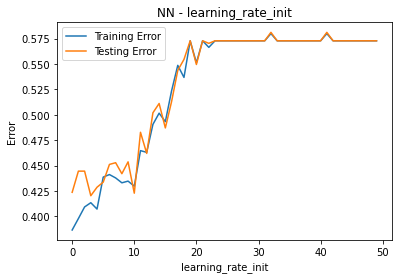

In [37]:
train_scores, valid_scores = validation_curve(MLPClassifier(max_iter=2000), X_train, y_train,'learning_rate_init',\
                                              np.linspace(start=0.0001,stop=0.4),cv=5,n_jobs=14)

draw_validation_curve('NN', 'learning_rate_init', train_scores, valid_scores)

/Users/sam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=hidden_layer_sizes, param_range=[(2,), (5,), (10,)] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


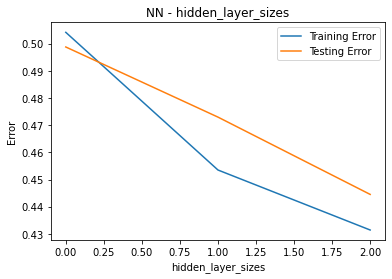

In [38]:

train_scores, valid_scores = validation_curve(MLPClassifier(max_iter=2000), \
                                              X_train, y_train,'hidden_layer_sizes',\
                                              [(2,), (5,), (10,)],cv=5,n_jobs=13)
draw_validation_curve('NN', 'hidden_layer_sizes', train_scores, valid_scores)

<function confusion_matrix at 0x7fcec5bf8700>


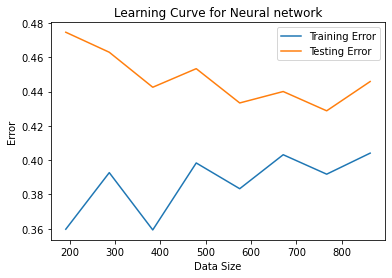

In [39]:

train_sizes, train_scores, test_scores =\
 learning_curve(MLPClassifier(activation='tanh',alpha=0.001,max_iter=2000,\
                              learning_rate='invscaling',learning_rate_init=0.001,hidden_layer_sizes=(10,)),\
 X_train, y_train, cv=cv, n_jobs=14,\
  train_sizes=[.2,.3,.4,.5,.6,.7,.8,.9])
draw_learning_curve('Neural network', train_sizes, train_scores, test_scores)